# Momentum

https://stockcharts.com/school/doku.php?id=chart_school:trading_strategies:moving_momentum

https://en.wikipedia.org/wiki/Momentum_(technical_analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,170.160004,172.300003,169.259995,172.259995,168.339050,25555900
2018-01-03,172.529999,174.550003,171.960007,172.229996,168.309738,29517900
2018-01-04,172.539993,173.470001,172.080002,173.029999,169.091522,22434600
2018-01-05,173.440002,175.369995,173.050003,175.000000,171.016678,23660000
2018-01-08,174.350006,175.610001,173.929993,174.350006,170.381485,20567800


In [3]:
n = 14
df['Momentum'] = df['Adj Close'] - df['Adj Close'].shift(n)

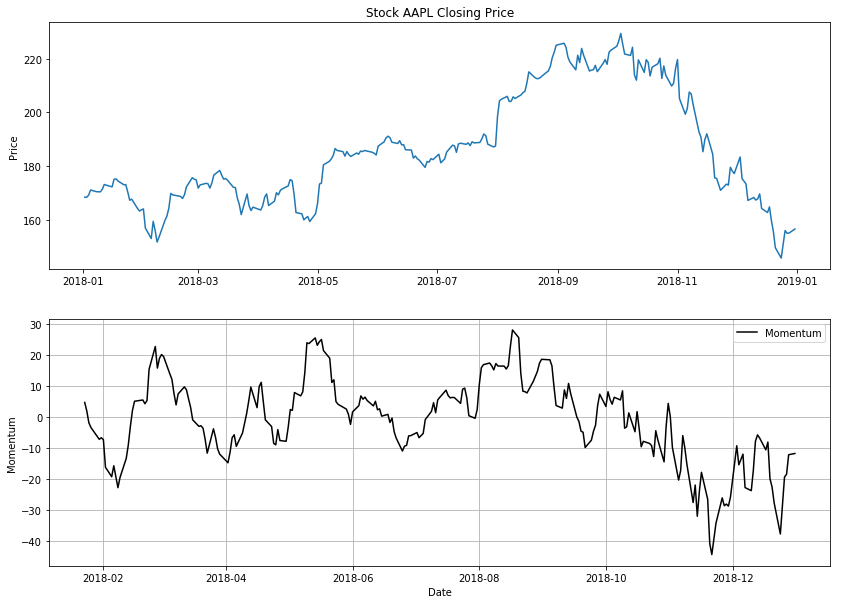

In [4]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Momentum'], label='Momentum', color='black')
#ax2.axhline(y=0, color='blue', linestyle='--')
#ax2.axhline(y=10, color='red')
#ax2.axhline(y=-10, color='green')
ax2.grid()
ax2.set_ylabel('Momentum')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with Momentum

In [5]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Momentum,VolumePositive
0,736696.0,170.160004,172.300003,169.259995,172.259995,168.339050,25555900,NaN,False
1,736697.0,172.529999,174.550003,171.960007,172.229996,168.309738,29517900,NaN,False
2,736698.0,172.539993,173.470001,172.080002,173.029999,169.091522,22434600,NaN,False
3,736699.0,173.440002,175.369995,173.050003,175.000000,171.016678,23660000,NaN,False
4,736702.0,174.350006,175.610001,173.929993,174.350006,170.381485,20567800,NaN,False


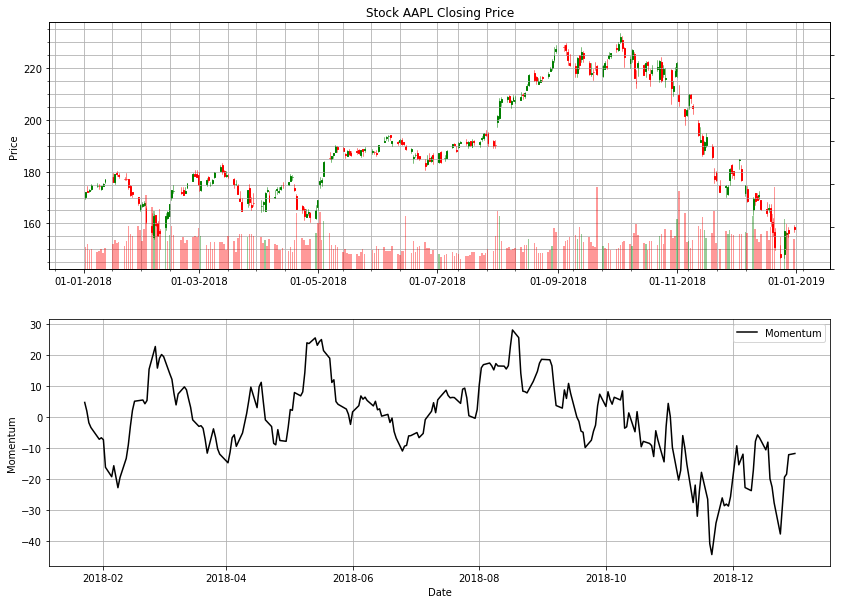

In [6]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Momentum'], label='Momentum', color='black')
ax2.grid()
ax2.set_ylabel('Momentum')
ax2.set_xlabel('Date')
ax2.legend(loc='best')